In [29]:
#basics libraries
import pandas as pd 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn libraries
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import validation_curve
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
X_train = pd.read_pickle('./data/X_train.pkl')
X_test = pd.read_pickle('./data/X_test.pkl')
y_train = pd.read_pickle('./data/y_train.pkl')
y_test = pd.read_pickle('./data/y_test.pkl')

In [3]:
model = RandomForestClassifier()

In [4]:
model.fit(X_train , np.ravel(y_train)).score(X_train, np.ravel(y_train))

1.0

In [5]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 20)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = RandomForestClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, np.ravel(y_train))

    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(np.ravel(y_train), train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(np.ravel(y_test), test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))


>1, train: 0.542, test: 0.544
>2, train: 0.547, test: 0.550
>3, train: 0.747, test: 0.749
>4, train: 0.823, test: 0.812
>5, train: 0.880, test: 0.863
>6, train: 0.895, test: 0.876
>7, train: 0.921, test: 0.898
>8, train: 0.940, test: 0.903
>9, train: 0.930, test: 0.894
>10, train: 0.951, test: 0.909
>11, train: 0.955, test: 0.917
>12, train: 0.961, test: 0.923
>13, train: 0.969, test: 0.931
>14, train: 0.971, test: 0.941
>15, train: 0.974, test: 0.929
>16, train: 0.978, test: 0.938
>17, train: 0.978, test: 0.937
>18, train: 0.979, test: 0.932
>19, train: 0.981, test: 0.939


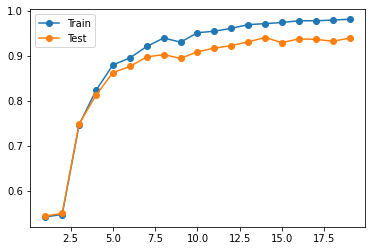

In [7]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [13]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [7,10,12,13],
    'n_estimators': [100], 
    'criterion': ['gini', 'entropy']
}

In [14]:
model_sel = GridSearchCV(model,param_grid)

In [15]:
model_sel.fit(X_train, np.ravel(y_train))

GridSearchCV(estimator=RandomForestClassifier(max_depth=19),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 10, 12, 13], 'n_estimators': [100]})

In [16]:
model_sel.best_estimator_.score(X_test, y_test)

0.9200689061154177

In [17]:
y_pred = model_sel.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3129
           1       0.93      0.90      0.91      2676

    accuracy                           0.92      5805
   macro avg       0.92      0.92      0.92      5805
weighted avg       0.92      0.92      0.92      5805



In [21]:
metrics.roc_auc_score(y_test, y_pred)

0.9185512499158028

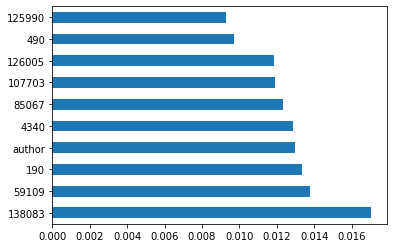

In [22]:
feature_importances = pd.Series(model_sel.best_estimator_.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')

In [25]:
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred)))
print(metrics.classification_report(y_test, y_pred))

Accuracy is: 0.9200689061154177
Mean Squared Error is: 0.2827208762800905
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3129
           1       0.93      0.90      0.91      2676

    accuracy                           0.92      5805
   macro avg       0.92      0.92      0.92      5805
weighted avg       0.92      0.92      0.92      5805



In [27]:
rf_cm = metrics.confusion_matrix(y_test, y_pred)
print(rf_cm)

[[2935  194]
 [ 270 2406]]


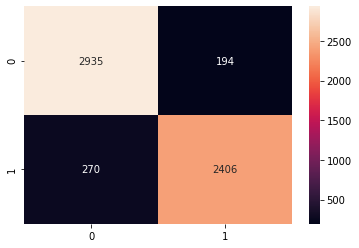

In [30]:
labels = np.array([['2935','194'],['270','2406']])
sns.heatmap(rf_cm, annot=labels, fmt = '')
plt.show()